In [2]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [3]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [4]:
head(df)

X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
1,1,2010-02-05,1643691,0,42.31,2.572,211.0964,8.106,NA
2,1,2010-02-12,1641957,1,38.51,2.548,211.2422,8.106,0.06907348
3,1,2010-02-19,1611968,0,39.93,2.514,211.2891,8.106,0.02223661
4,1,2010-02-26,1409728,0,46.63,2.561,211.3196,8.106,0.01443520
5,1,2010-03-05,1554807,0,46.50,2.625,211.3501,8.106,0.01443311
6,1,2010-03-12,1439542,0,57.79,2.667,211.3806,8.106,0.01443103


Estudando o Efeiito do CPI

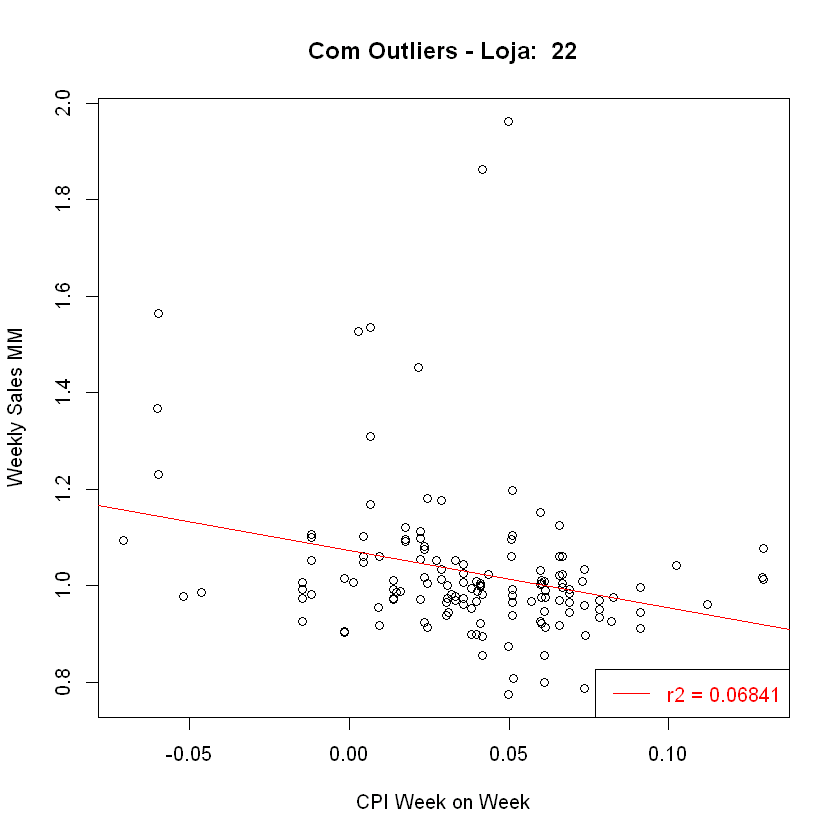

In [11]:
nstore = 22
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}



plot(dfplot$Weekly_CPI,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'CPI Week on Week',
    main = paste( 'Com Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Weekly_CPI)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")



In [ ]:
2

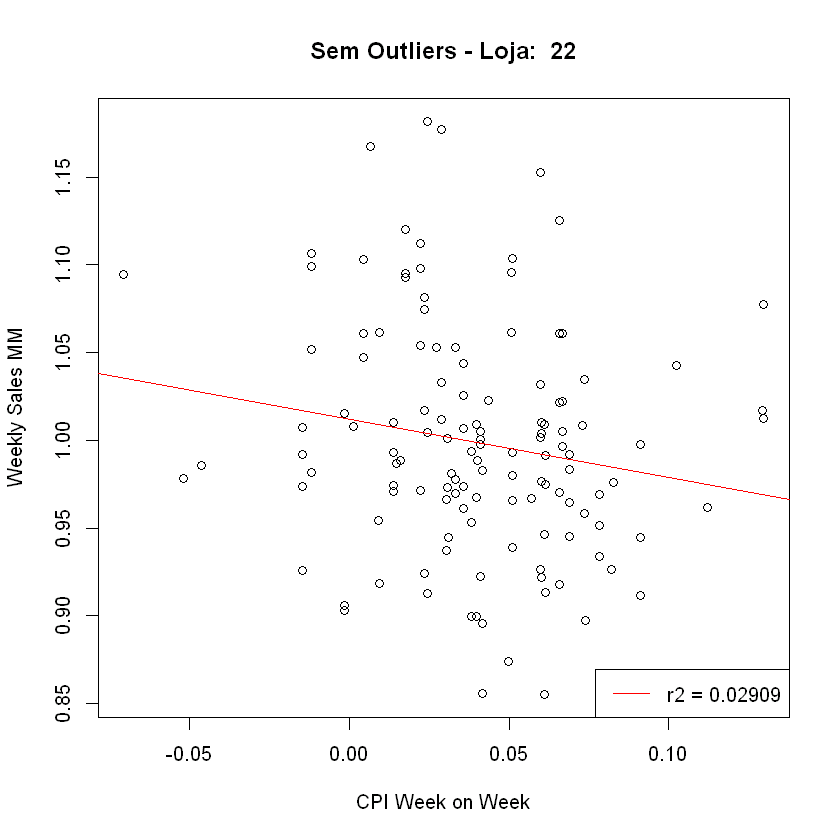

In [12]:
nstore = 22

# Calculate Q1, Q3, and IQR
if (nstore > 0){
    Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
    Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
    } else {
    Q1 <- quantile(df$Weekly_Sales, 0.25)
    Q3 <- quantile(df$Weekly_Sales, 0.75) 
    }

IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

if (nstore > 0){
   dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
} else {
    dfplot = dfplot = df[(df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
}
plot(dfplot$Weekly_CPI,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'CPI Week on Week',
    main = paste( 'Sem Outliers - Loja: ', nstore))

lm_model = lm(dfplot$Weekly_Sales/1000000 ~dfplot$Weekly_CPI)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="black")

text(50, 0.5, "Title", col="green", cex=1.5)

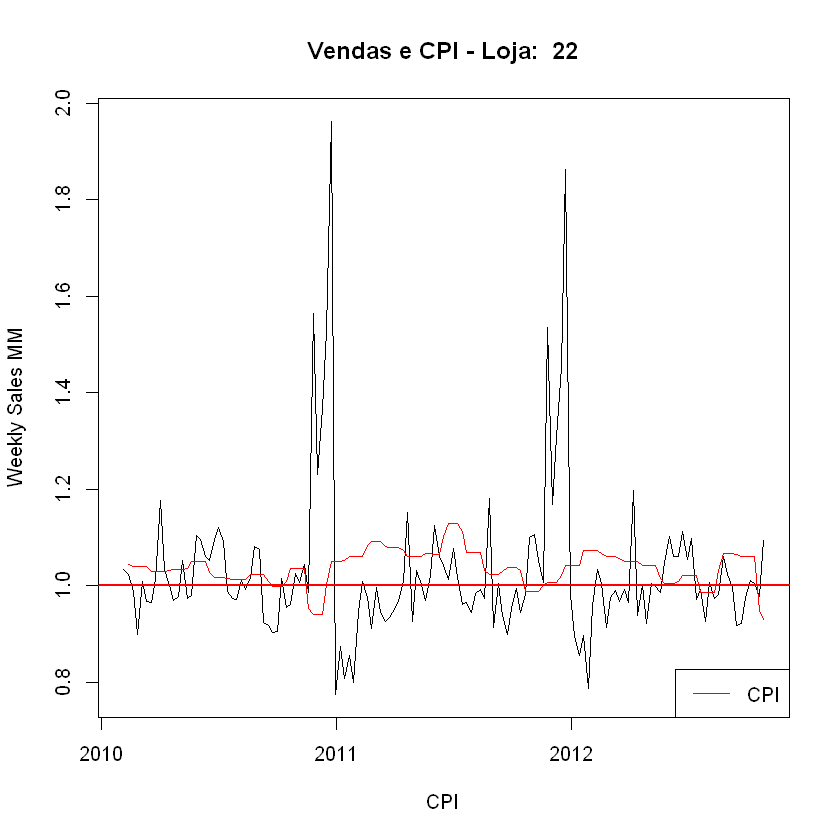

In [15]:
nstore = 22

dfplot = df[(df$Store == nstore),]

plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'CPI',
    main = paste( 'Vendas e CPI - Loja: ', nstore))
lines(dfplot$Date,(dfplot$Weekly_CPI+1),
      col = "red")
abline(h = 1, col = "red", lwd = 2)
legend("bottomright", legend="CPI", lty=1, col="red", text.col="black")
